In [1]:
#This notebook is me trying to reimplement dm electron scattering rate calculation found in wimprates
#https://github.com/JelleAalbers/wimprates/tree/master

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/598244735.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(extend='both', label='$|f_\mathrm{ion}|^2$')
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/598244735.py:26: SyntaxWarning: invalid escape sequence '\s'
  "$q = \sqrt{2 m_e \, (E_R + E_b)}$", color='w')


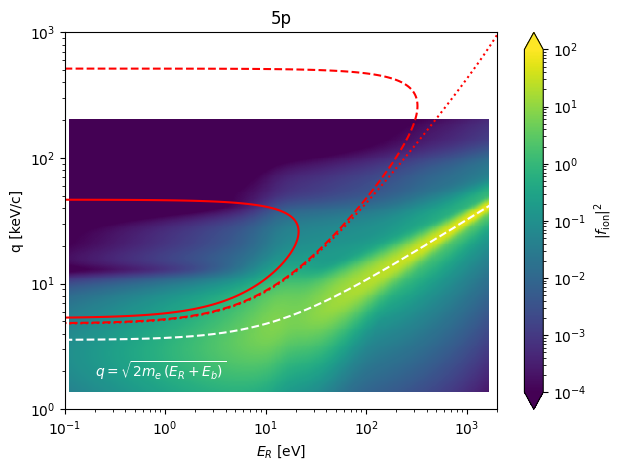

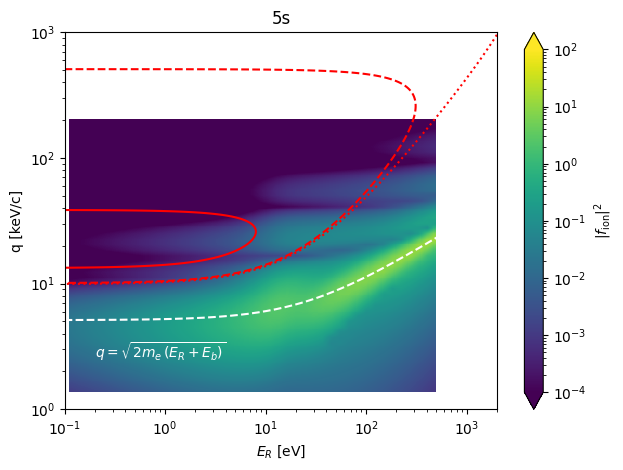

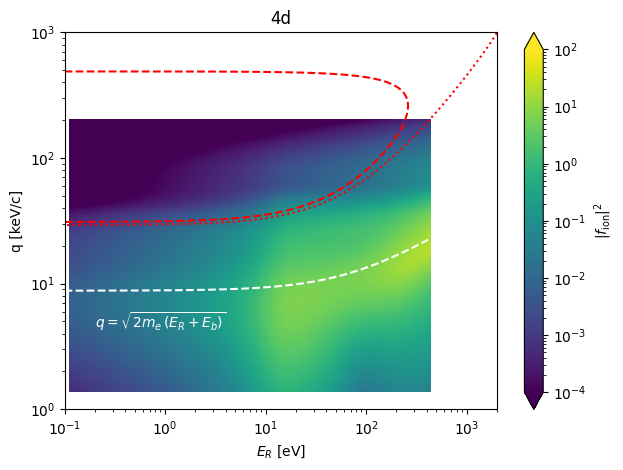

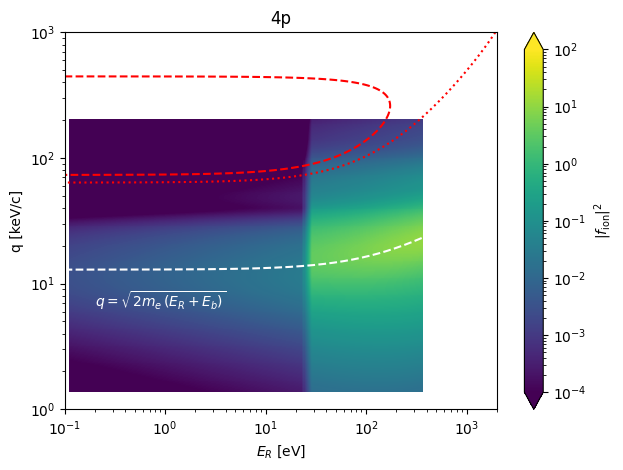

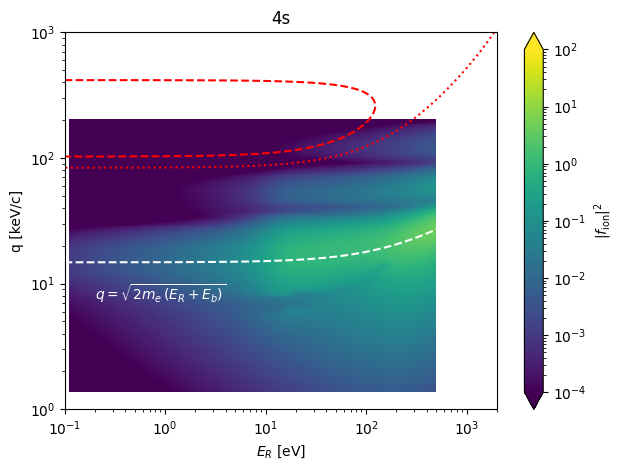

In [2]:
from electron import *
import matplotlib
import matplotlib.pyplot as plt

e_er = np.geomspace(.1, 2000, 400)
q = np.geomspace(1, 1000, 400)

grid_e, grid_q = np.meshgrid(e_er, q)

for shell in dme_shells:
    ff2 = dme_ionization_ff(
        shell,
        grid_e.ravel() * nu.eV,
        grid_q.ravel() * nu.keV / nu.c0).reshape(grid_e.shape)

    plt.pcolormesh(grid_e, grid_q, ff2, 
                   norm=matplotlib.colors.LogNorm(vmin=1e-4, vmax=1e2),
                   cmap=plt.cm.viridis)
    plt.colorbar(extend='both', label='$|f_\mathrm{ion}|^2$')
    
    eb = binding_es_for_dme(*shell)
    y = (2 * nu.me * (e_er * nu.eV + eb))**0.5 / (nu.keV/nu.c0)
    plt.plot(e_er, y,
             color='w', linestyle='--')
    plt.text(0.2, 0.5 * y[np.argmin(np.abs(e_er - 0.2))],
             "$q = \sqrt{2 m_e \, (E_R + E_b)}$", color='w')
    
    for m, linestyle in zip([10, 100, 1000], ['-', '--', ':']):
        plt.contour(
            grid_e, grid_q, 
            v_min_dme(eb, grid_e * nu.eV, grid_q * nu.keV/nu.c0, 
                         mw=m * nu.MeV/nu.c0**2),
            levels=[v_max()], colors=['r'], linestyles=[linestyle])

    plt.xscale('log')
    plt.xlabel("$E_R$ [eV]")

    plt.yscale('log')
    plt.ylim(1, 1000)
    plt.ylabel("q [keV/c]")

    shell = shell_str(*shell)
    plt.title(shell)
    plt.tight_layout()
    plt.savefig('form_factor_%s.png' % shell, dpi=200, bbox_inches='tight')
    plt.show()

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/1257695712.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.colorbar(extend='both', label='$|f_\mathrm{ion}|^2$')
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/1257695712.py:23: SyntaxWarning: invalid escape sequence '\s'
  "$q = \sqrt{2 m_e \, (E_R + E_b)}$", color='w')


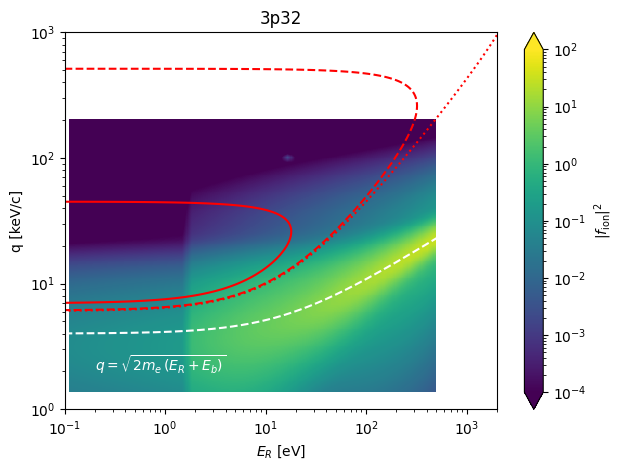

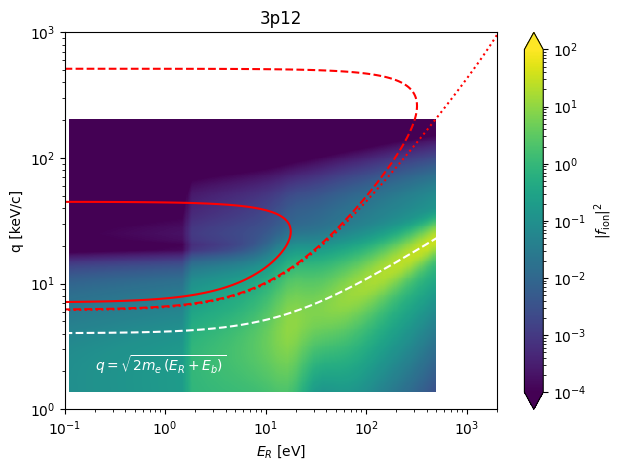

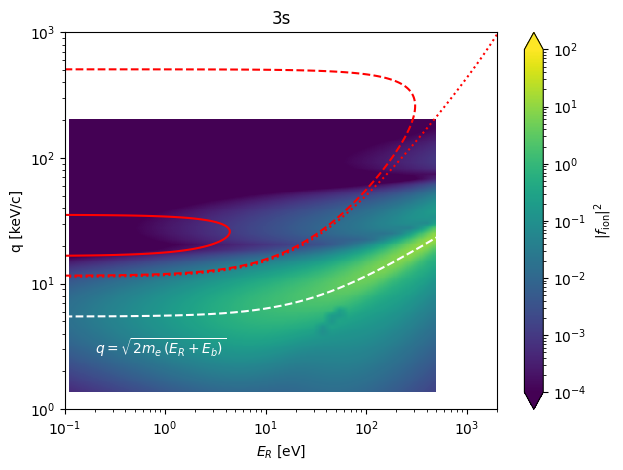

In [3]:
from electron import *
e_er = np.geomspace(.1, 2000, 400)
q = np.geomspace(1, 1000, 400)

grid_e, grid_q = np.meshgrid(e_er, q)

for shell in argon_dme_shells:
    ff2 = dme_ionization_ff(
        shell,
        grid_e.ravel() * nu.eV,
        grid_q.ravel() * nu.keV / nu.c0,argon=True).reshape(grid_e.shape)

    plt.pcolormesh(grid_e, grid_q, ff2, 
                   norm=matplotlib.colors.LogNorm(vmin=1e-4, vmax=1e2),
                   cmap=plt.cm.viridis)
    plt.colorbar(extend='both', label='$|f_\mathrm{ion}|^2$')
    
    eb = binding_es_for_dme_argon(*shell)
    y = (2 * nu.me * (e_er * nu.eV + eb))**0.5 / (nu.keV/nu.c0)
    plt.plot(e_er, y,
             color='w', linestyle='--')
    plt.text(0.2, 0.5 * y[np.argmin(np.abs(e_er - 0.2))],
             "$q = \sqrt{2 m_e \, (E_R + E_b)}$", color='w')
    
    for m, linestyle in zip([10, 100, 1000], ['-', '--', ':']):
        plt.contour(
            grid_e, grid_q, 
            v_min_dme(eb, grid_e * nu.eV, grid_q * nu.keV/nu.c0, 
                         mw=m * nu.MeV/nu.c0**2),
            levels=[v_max()], colors=['r'], linestyles=[linestyle])

    plt.xscale('log')
    plt.xlabel("$E_R$ [eV]")

    plt.yscale('log')
    plt.ylim(1, 1000)
    plt.ylabel("q [keV/c]")

    shell = shell_str(*shell,argon=True)
    plt.title(shell)
    plt.tight_layout()
    plt.savefig('form_factor_%s.png' % shell, dpi=200, bbox_inches='tight')
    plt.show()

array([3.89386263e-06, 3.87922390e-06, 3.86405955e-06, 3.84778467e-06,
       3.83231423e-06, 3.81739628e-06, 3.80116079e-06, 3.78472768e-06,
       3.77118977e-06, 3.75605750e-06, 3.73924638e-06, 3.72749047e-06,
       3.71449245e-06, 3.69949045e-06, 3.68862342e-06, 3.67955392e-06,
       3.66809899e-06, 3.65845420e-06, 3.65610691e-06, 3.65097331e-06,
       3.64286013e-06, 3.65234866e-06, 3.65862640e-06, 3.66141374e-06,
       3.68190834e-06, 3.70828201e-06, 3.73079689e-06, 3.76754987e-06,
       3.82977008e-06, 3.88836845e-06, 3.94870202e-06, 4.07118552e-06,
       4.19203142e-06, 4.31028362e-06, 4.49676377e-06, 4.70549823e-06,
       4.91557405e-06, 5.14882340e-06, 5.40911426e-06, 5.66944578e-06,
       5.90504666e-06, 6.02173419e-06, 6.12187082e-06, 6.20358795e-06,
       6.02139962e-06, 5.79010837e-06, 5.54998505e-06, 5.20298742e-06,
       4.79307188e-06, 4.40547918e-06, 4.02526470e-06, 3.63120277e-06,
       3.27287878e-06, 2.94846405e-06, 2.64350067e-06, 2.37056211e-06,
      

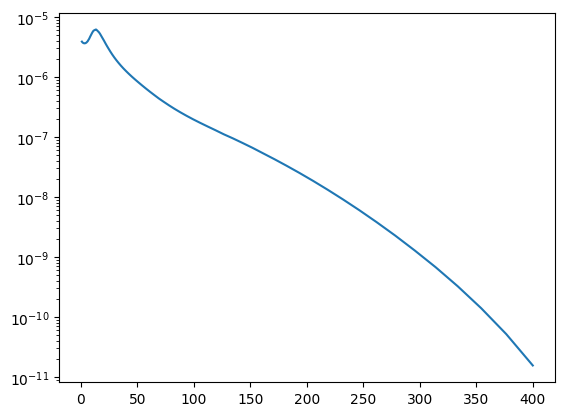

In [34]:

test = drs['5s'] * nu.kg * nu.keV *nu.day
plt.plot(np.geomspace(1,400,100),test)
plt.yscale('log')
test

Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (3.228239154579894e-27, 131.293, 2.1801715567111377e-25)
Xe n_t = (

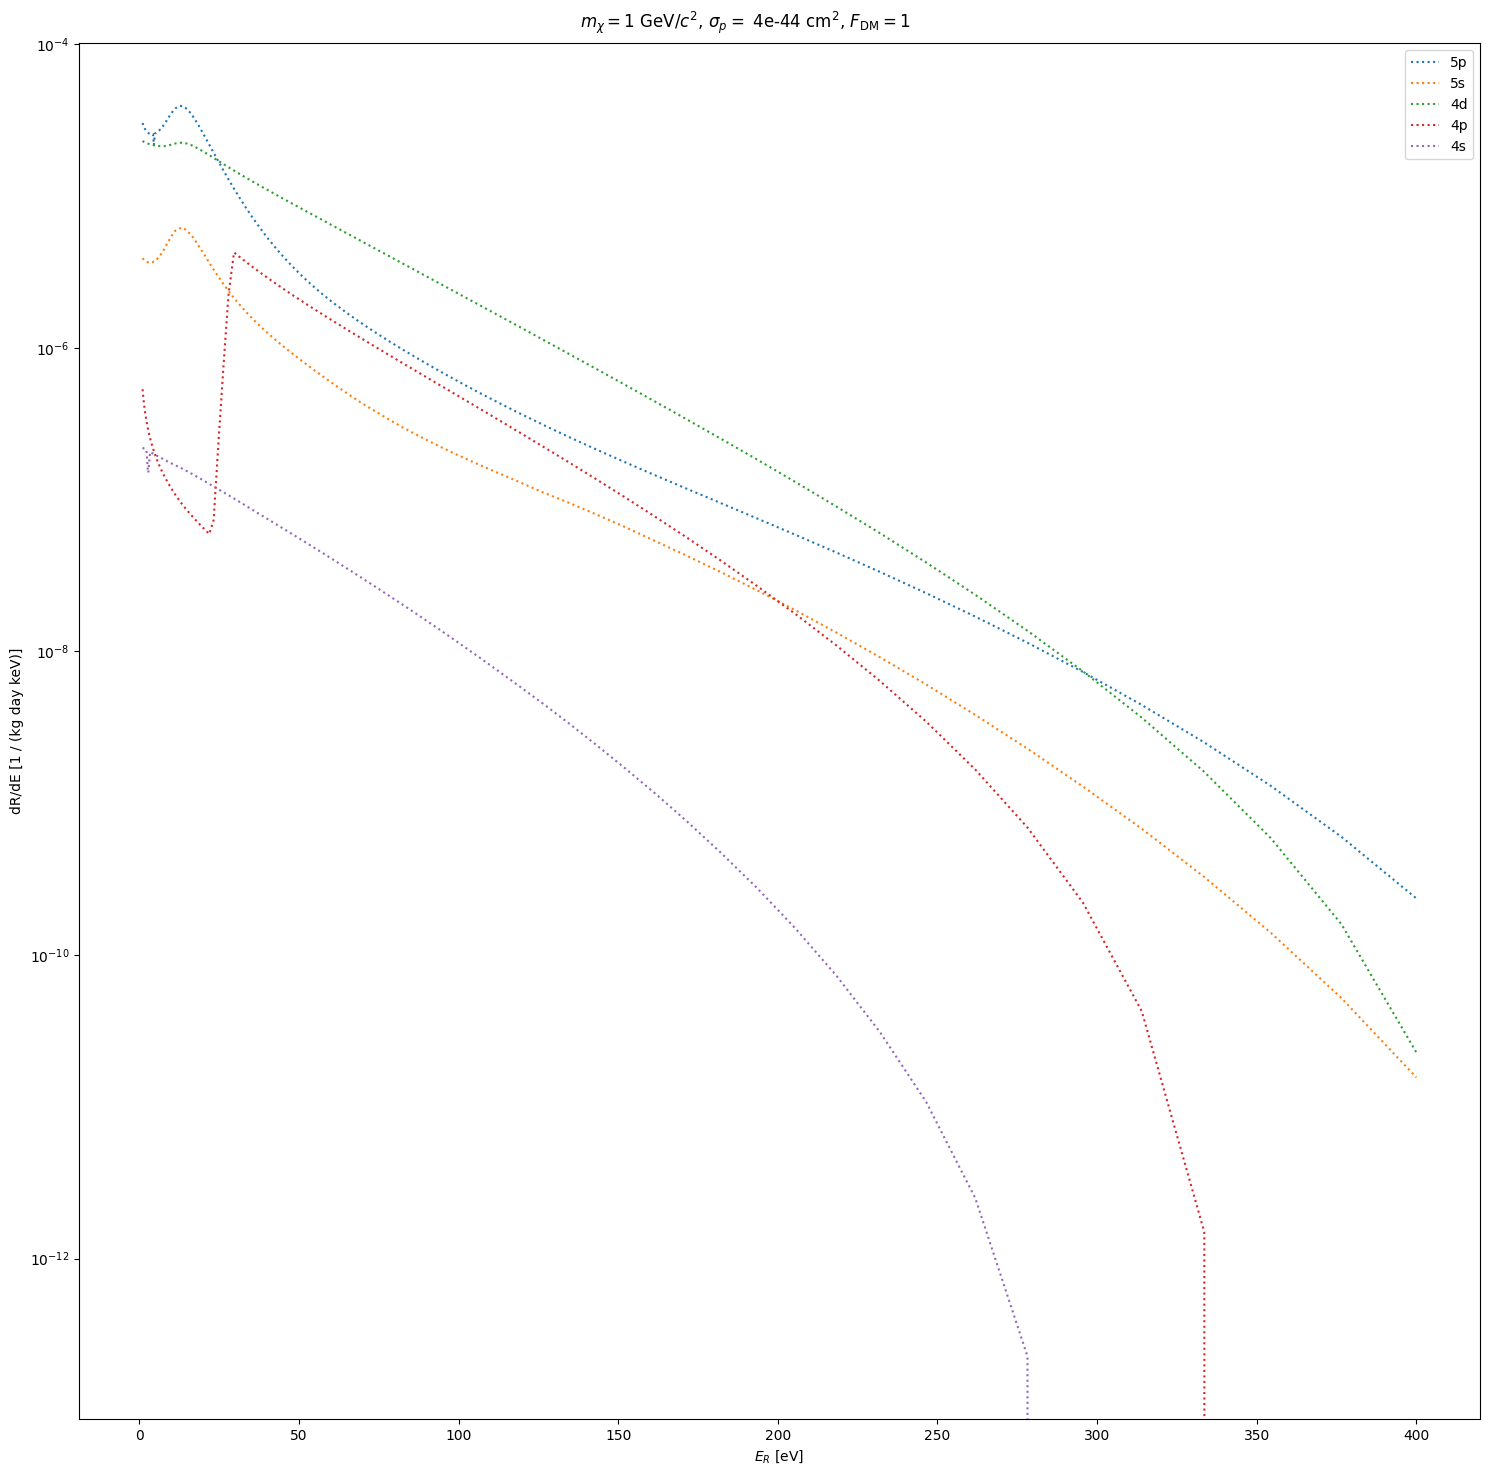

In [28]:
from wimprates import *
sigmaP = 4e-44
m_gev = 1
mMeV = 1000

sigmaE = sigmaP_to_sigmaE(sigmaP,mMeV)
fdm = 0
drs =dR(mMeV,sigmaE,fdm,isoangle = None,mat = 'Xe',useVerne = False)

plot_dR(drs,m_gev,sigmaP,mat= 'Xe')


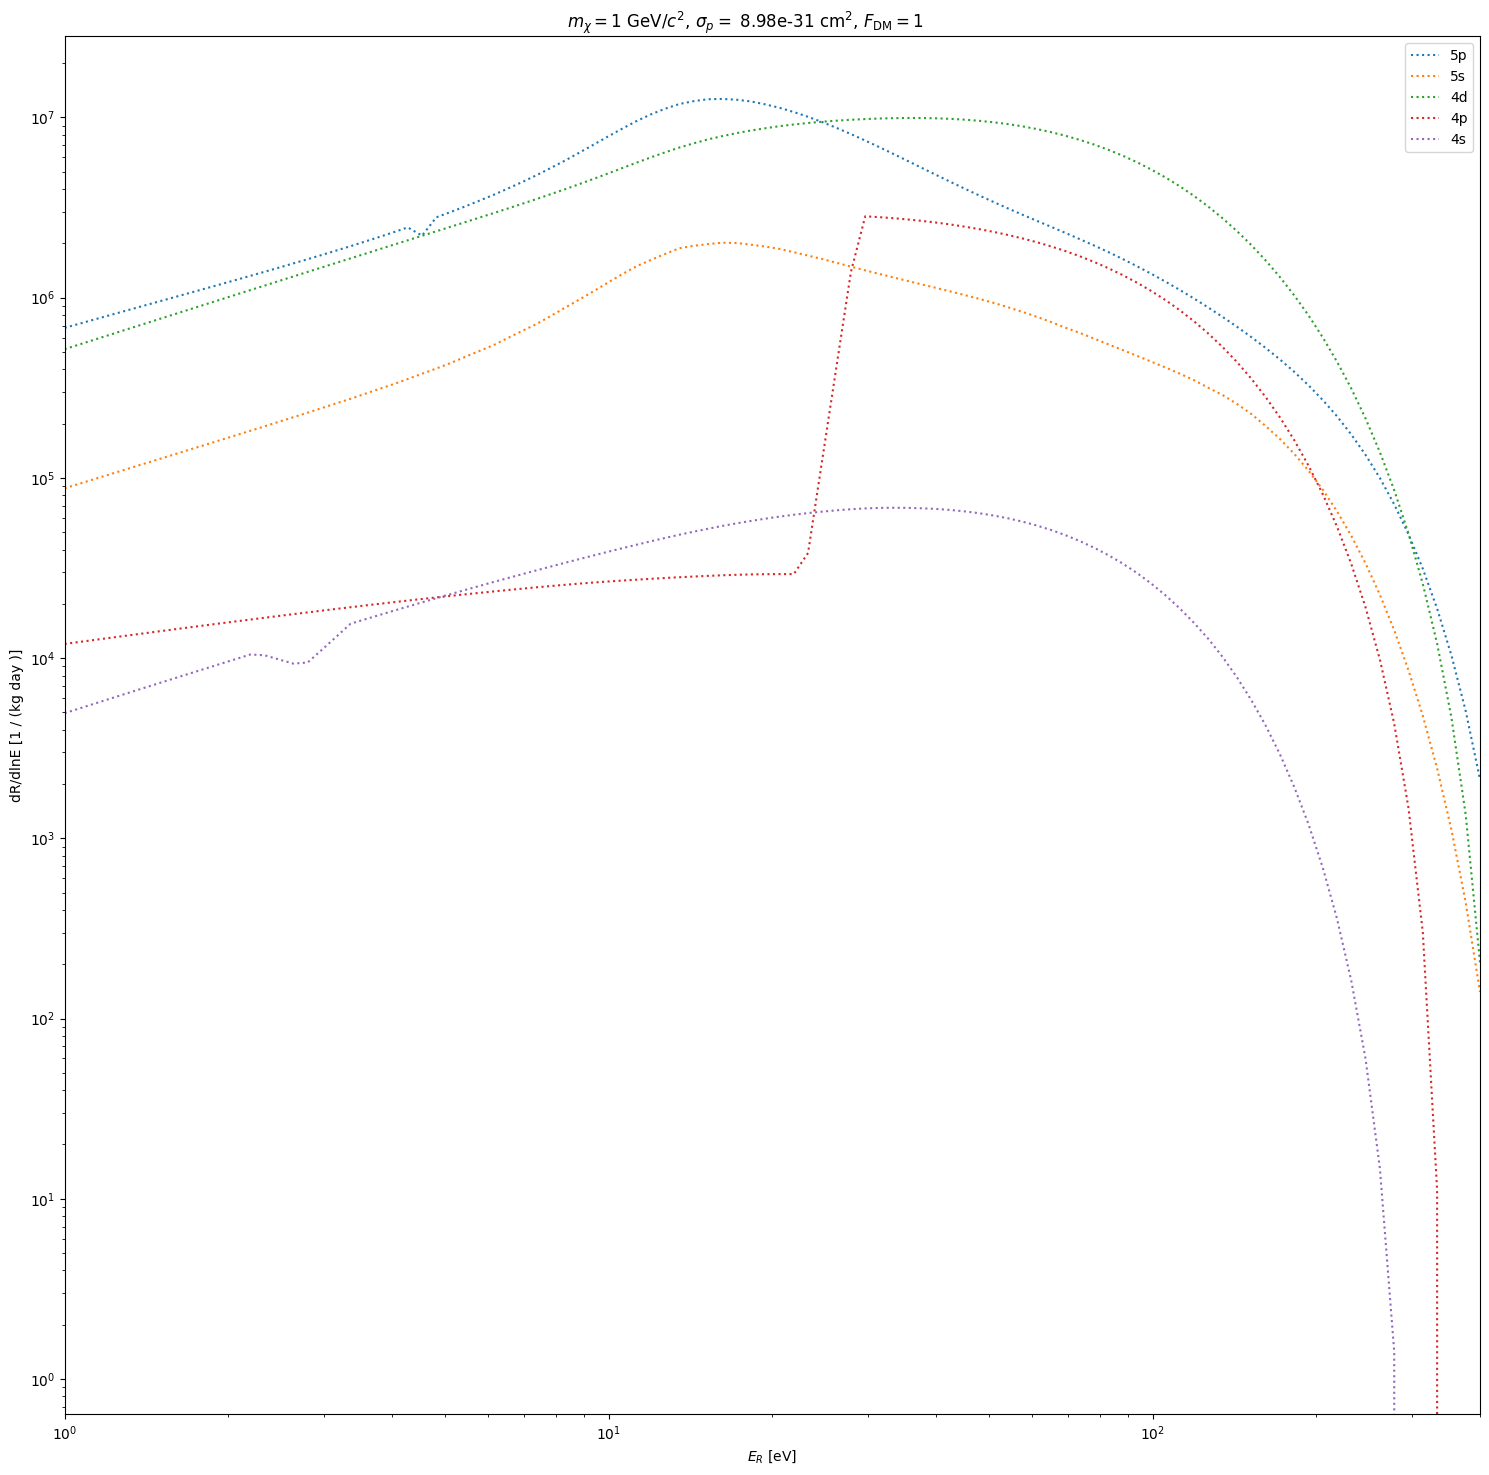

In [5]:
from wimprates import *
m_gev = 1
mMeV = 1000

sigmaE = 1e-36
sigmaP = sigmaE_to_sigmaP(sigmaE,mMeV)
fdm = 0
drs =dR(mMeV,sigmaE,fdm,isoangle = None,mat = 'Xe',useVerne = False,lnE = True)

plot_dR(drs,m_gev,sigmaP,mat= 'Xe',lnE = True)


Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.63352146325368e-26)
Ar n_t = (9.822435144840746e-28, 39.948, 6.633521463253

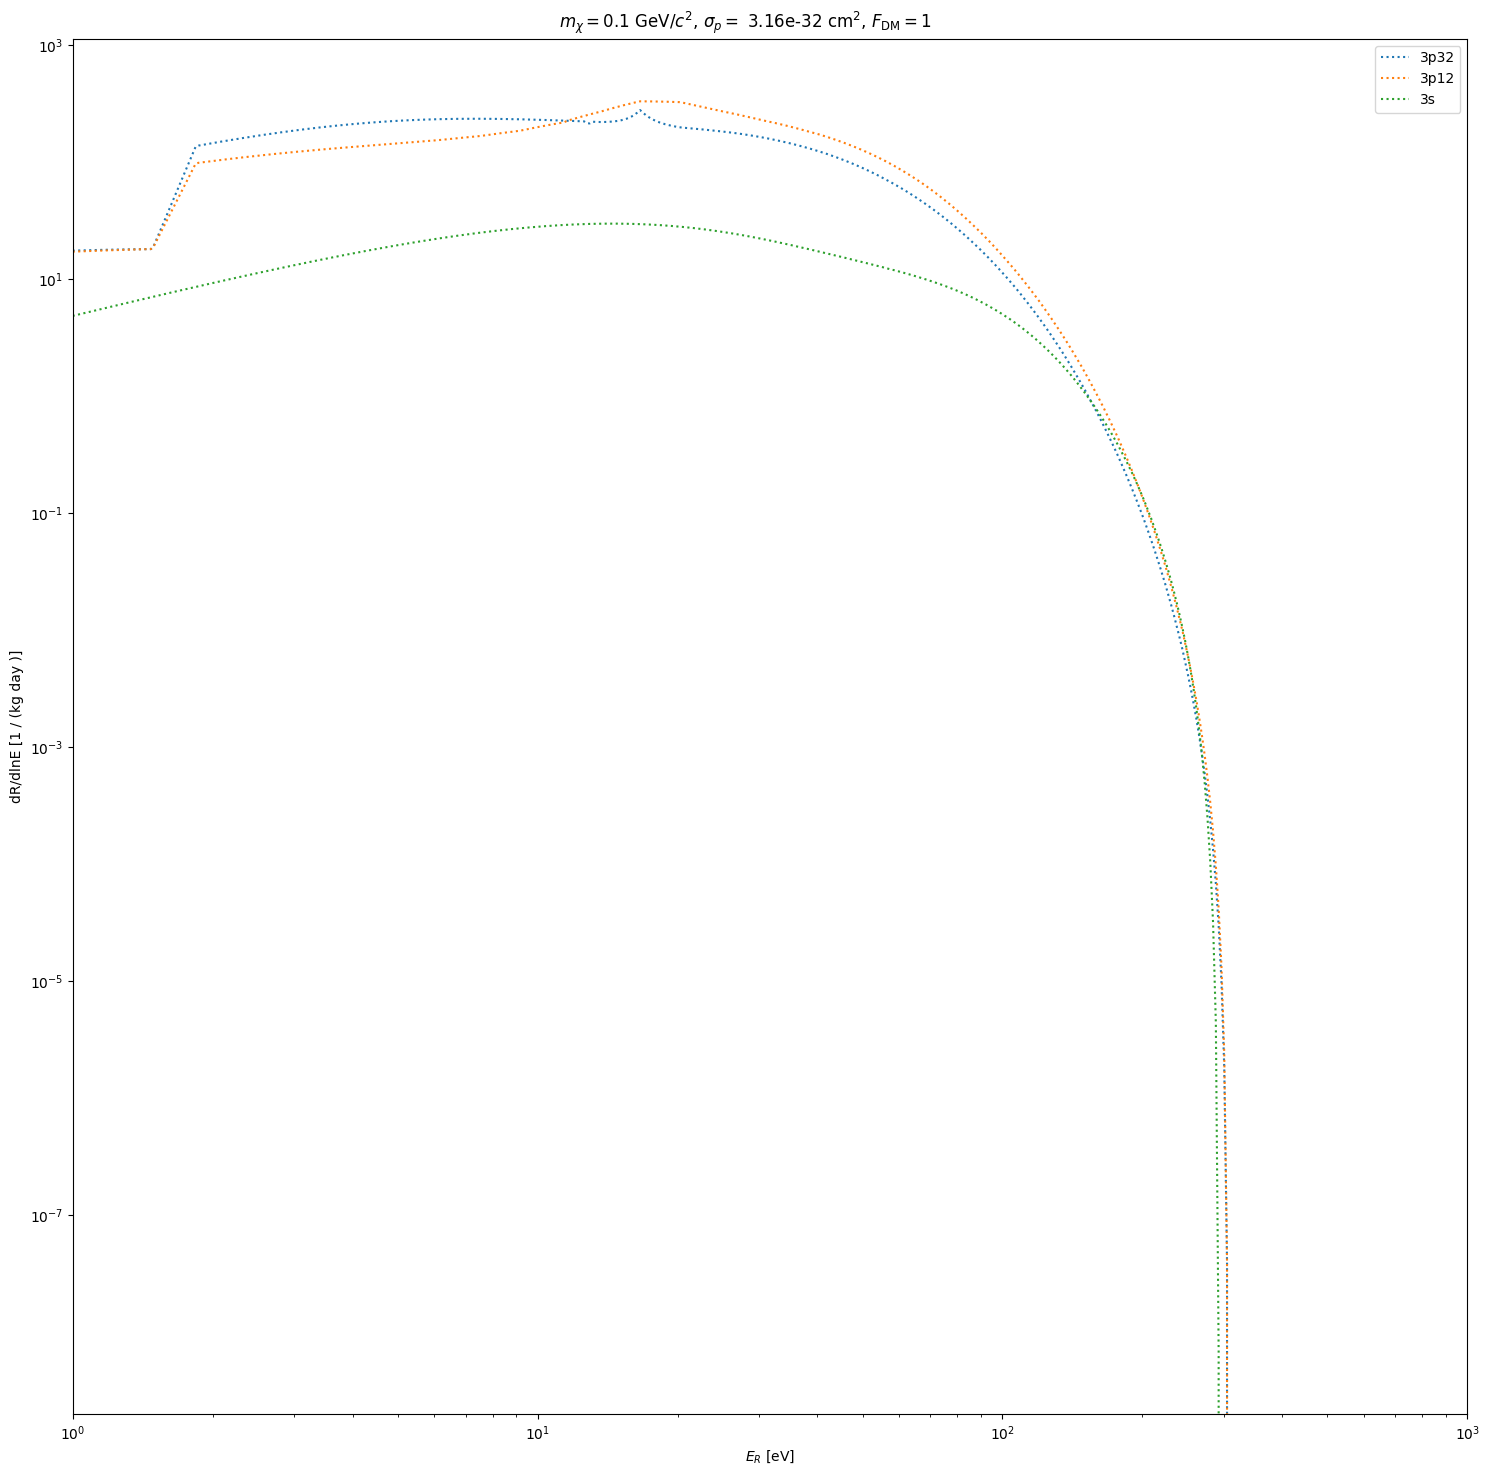

In [1]:
from wimprates import *
m_gev = 0.1
mMeV = 100

sigmaE = 1e-36
sigmaP = sigmaE_to_sigmaP(sigmaE,mMeV)

fdm = 0

drs_compare =dR(mMeV,sigmaE,fdm,isoangle = None,mat = 'Ar',useVerne = False,lnE = True,largeGrid=True)

plot_dR(drs_compare,m_gev,sigmaP,mat= 'Ar',lnE = True,largeGrid=True)

matching factor 0.9999999999999998


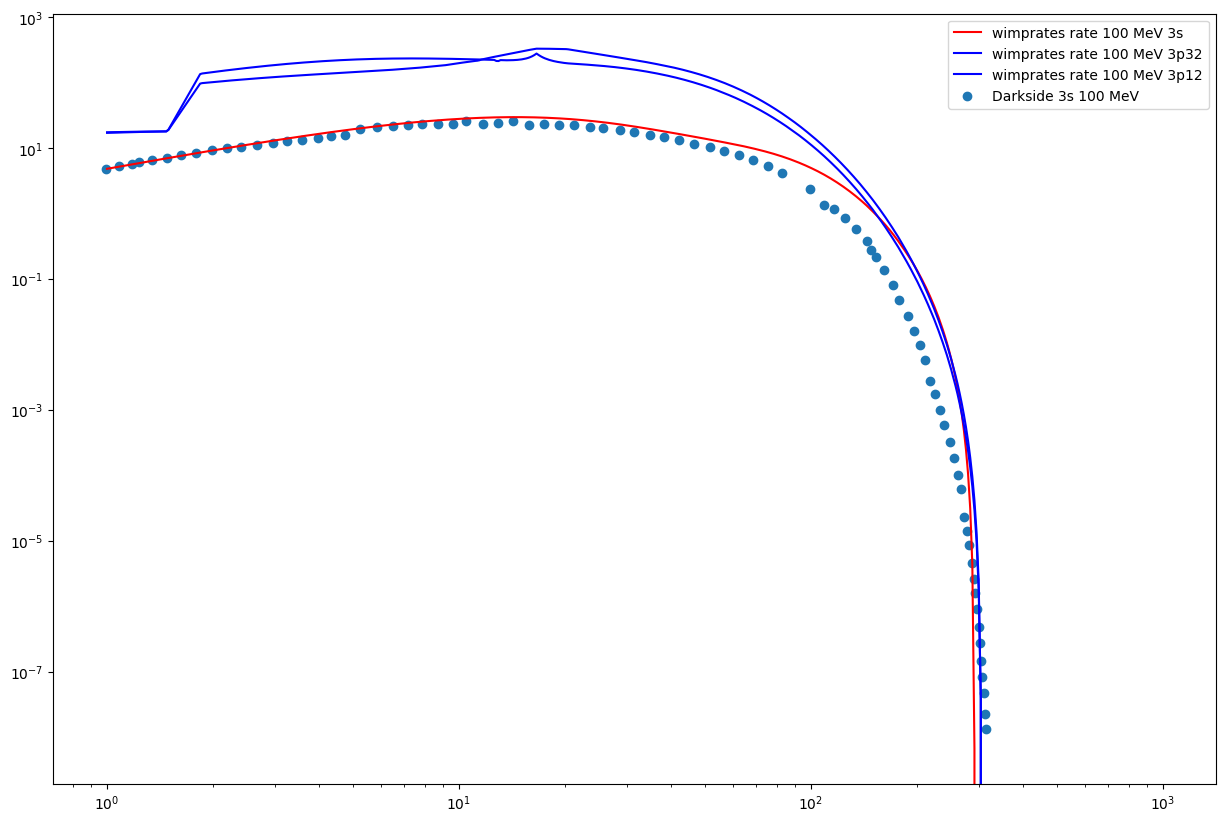

In [7]:
from wimprates import *

e_er = np.geomspace(1, 1000, 500)
darkside = np.loadtxt('darkside_100MeV_1e-36_fdm0_3s.csv',delimiter=',')
darksideE = darkside[:,0]
darksidedRdlnE = darkside[:,1]
mMeV = 100
sigmaE = 1e-36
fdm = 0
wr_results =dR(mMeV,sigmaE,fdm,isoangle = None,mat = 'Ar',useVerne = False,lnE = True,largeGrid=True)

wr_3s_result = wr_results['3s'] * nu.kg * nu.day

wr_3p32_result = wr_results['3p32'] * nu.kg * nu.day

wr_3p12_result = wr_results['3p12'] * nu.kg * nu.day


matching_factor = darksidedRdlnE[0]  / wr_3s_result[0]
print('matching factor', matching_factor)
plt.figure(figsize=(15,10))
plt.plot(e_er,wr_3s_result * matching_factor,label='wimprates rate 100 MeV 3s',color = 'red')
plt.plot(e_er,wr_3p32_result * matching_factor,label='wimprates rate 100 MeV 3p32',color='blue')

plt.plot(e_er,wr_3p12_result * matching_factor,label='wimprates rate 100 MeV 3p12',color='blue')



plt.scatter(darksideE,darksidedRdlnE,label='Darkside 3s 100 MeV')
plt.legend()
plt.yscale('log')
plt.xscale('log')

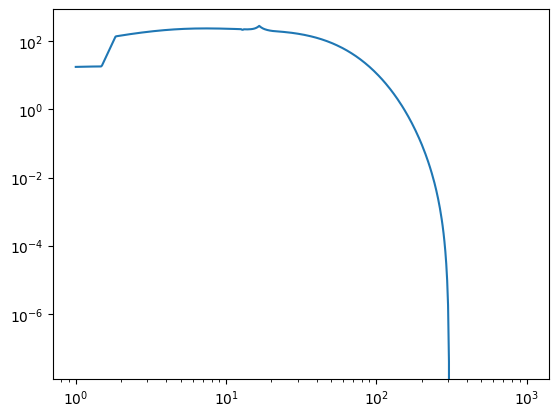

In [8]:
e_er = np.geomspace(1, 1000, 500)

plt.plot(e_er,wr_3p32_result * matching_factor,label='wimprates rate 100 MeV 3p32')
plt.yscale('log')
plt.xscale('log')

In [9]:
1/ 5.963307622096163e-05

16769.2170750113

<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\s'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/1234250950.py:48: SyntaxWarning: invalid escape sequence '\s'
  plt.title('FDM = 1 $\sigma_e = 10^{-36}$')


Text(0.5, 1.0, 'FDM = 1 $\\sigma_e = 10^{-36}$')

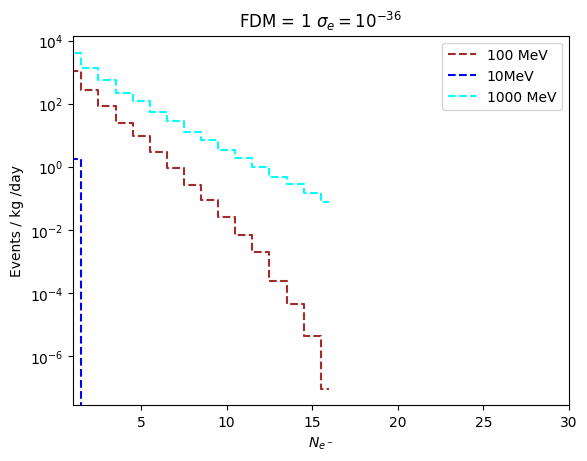

In [10]:
from wimprates import *
# sigmaP = 4e-44
# m_gev = 1
# mMeV = 1000

# sigmaE = sigmaP_to_sigmaE(sigmaP,mMeV)

fdm = 0
sigmaE = 1e-36
mMeV = 100
sigmaP = sigmaE_to_sigmaP(sigmaE,mMeV)
m_gev = mMeV*1e-3
n_el,argon_rates = dRdnE(mMeV,sigmaE,fdm,isoangle=None,mat = 'Ar',ne='All',return_shells=True,useVerne = True)


n_el,argon_rates_10 = dRdnE(10,sigmaE,fdm,isoangle=None,mat = 'Ar',ne='All',return_shells=True,useVerne = True)

n_el,argon_rates_1000 = dRdnE(1000,sigmaE,fdm,isoangle=None,mat = 'Ar',ne='All',return_shells=True,useVerne = True)



# plot_dRdne(n_el,argon_rates,m_gev,sigmaP,tonyear=False,day=True)
plt.plot(n_el, np.sum(np.array(list(argon_rates.values()))*1/365, axis=0),
            label='100 MeV',
            drawstyle='steps-mid', 
            linestyle='--', 
            c='brown')

plt.plot(n_el, np.sum(np.array(list(argon_rates_10.values()))*1/365, axis=0),
            label='10MeV',
            drawstyle='steps-mid', 
            linestyle='--', 
            c='blue')


plt.plot(n_el, np.sum(np.array(list(argon_rates_1000.values()))*1/365, axis=0),
            label='1000 MeV',
            drawstyle='steps-mid', 
            linestyle='--', 
            c='cyan')


plt.yscale('log')
plt.xlim(1,30)
plt.xlabel('$N_{e^-}$')
plt.ylabel('Events / kg /day')
plt.legend()
plt.title('FDM = 1 $\sigma_e = 10^{-36}$')
# plt.ylim(1e-3,1e2)

<>:48: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\p'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/4011741394.py:48: SyntaxWarning: invalid escape sequence '\p'
  plt.title('FDM $\propto$ $1/q^2$ $\sigma_e = 10^{-33}$')


Text(0.5, 1.0, 'FDM $\\propto$ $1/q^2$ $\\sigma_e = 10^{-33}$')

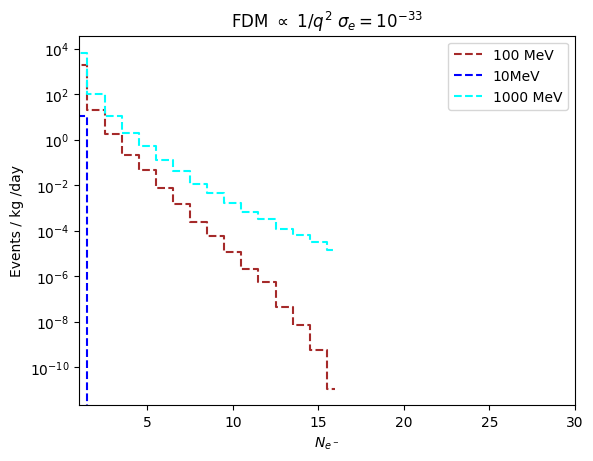

In [11]:
from wimprates import *
# sigmaP = 4e-44
# m_gev = 1
# mMeV = 1000

# sigmaE = sigmaP_to_sigmaE(sigmaP,mMeV)

fdm = 2
sigmaE = 1e-33
mMeV = 100
sigmaP = sigmaE_to_sigmaP(sigmaE,mMeV)
m_gev = mMeV*1e-3
n_el,argon_rates_light = dRdnE(mMeV,sigmaE,fdm,isoangle=None,mat = 'Ar',ne='All',return_shells=True,useVerne = True)


n_el,argon_rates_10_light = dRdnE(10,sigmaE,fdm,isoangle=None,mat = 'Ar',ne='All',return_shells=True,useVerne = True)

n_el,argon_rates_1000_light = dRdnE(1000,sigmaE,fdm,isoangle=None,mat = 'Ar',ne='All',return_shells=True,useVerne = True)



# plot_dRdne(n_el,argon_rates,m_gev,sigmaP,tonyear=False,day=True)
plt.plot(n_el, np.sum(np.array(list(argon_rates_light.values()))*1/365, axis=0),
            label='100 MeV',
            drawstyle='steps-mid', 
            linestyle='--', 
            c='brown')

plt.plot(n_el, np.sum(np.array(list(argon_rates_10_light.values()))*1/365, axis=0),
            label='10MeV',
            drawstyle='steps-mid', 
            linestyle='--', 
            c='blue')


plt.plot(n_el, np.sum(np.array(list(argon_rates_1000_light.values()))*1/365, axis=0),
            label='1000 MeV',
            drawstyle='steps-mid', 
            linestyle='--', 
            c='cyan')


plt.yscale('log')
plt.xlim(1,30)
plt.xlabel('$N_{e^-}$')
plt.ylabel('Events / kg /day')
plt.legend()
plt.title('FDM $\propto$ $1/q^2$ $\sigma_e = 10^{-33}$')

# plt.ylim(1e-3,1e2)

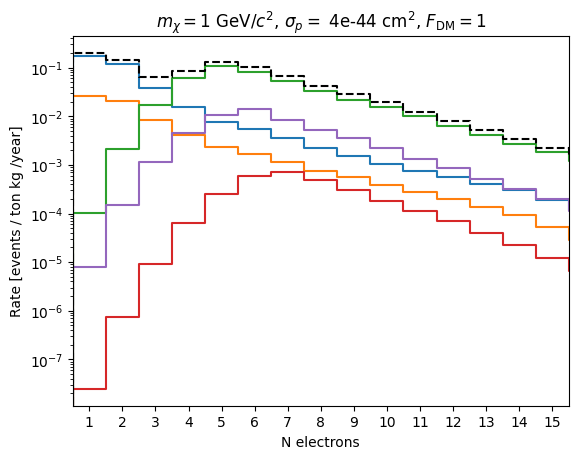

In [12]:
from wimprates import *
sigmaP = 4e-44
m_gev = 1
mMeV = 1000

sigmaE = sigmaP_to_sigmaE(sigmaP,mMeV)
fdm = 0
n_el,drsn_recreation = dRdnE(mMeV,sigmaE,fdm,isoangle=None,mat = 'Xe',ne='All',return_shells=True,useVerne = True)
plot_dRdne(n_el,drsn_recreation,m_gev,sigmaP,tonyear=True)
# plot_dRdne(n_el,drsn_recreation,m_gev,sigmaP,tonyear=False)

# plot_dRdne(n_el,drsn_recreation,m_gev,sigmaP,tonyear=False,day=True)

recreation_rates = np.sum(list(drsn_recreation.values()),axis=0)


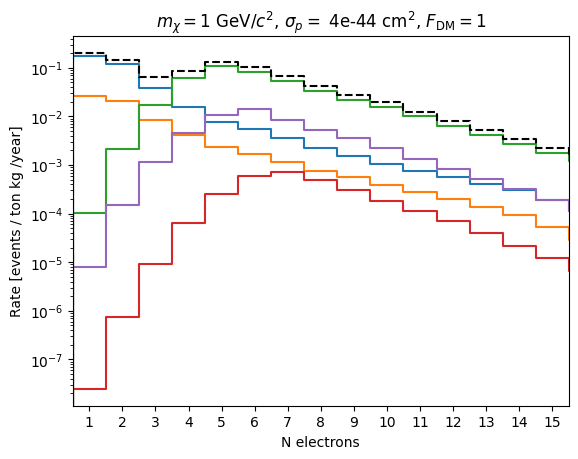

In [13]:
sigmaP = 4e-44
m_gev = 1
mMeV = 1000

sigmaE = sigmaP_to_sigmaE(sigmaP,mMeV)
fdm = 0
n_el,drsn_modulation_recreation = dRdnE(mMeV,sigmaE,fdm,isoangle=4,mat = 'Xe',ne='All',return_shells=True,useVerne = True)
plot_dRdne(n_el,drsn_modulation_recreation,m_gev,sigmaP,tonyear=True)


iso_recreation_rates = np.sum(list(drsn_modulation_recreation.values()),axis=0)

In [14]:
#check differences
iso_recreation_rates / recreation_rates

/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/3174277638.py:2: RuntimeWarning: invalid value encountered in divide
  iso_recreation_rates / recreation_rates


array([       nan, 1.00910382, 1.00814202, 1.00783135, 1.00800251,
       1.00764796, 1.00660642, 1.00584996, 1.00501493, 1.00416401,
       1.00344853, 1.00259957, 1.00174849, 1.00093789, 1.00001522,
       0.99903219, 0.99796647])

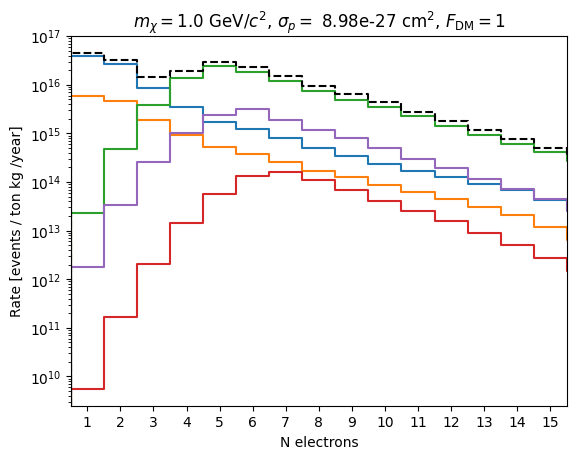

[0.00000000e+00 4.52155404e+13 3.17890756e+13 1.46426748e+13
 1.94150041e+13 2.91580588e+13 2.32555310e+13 1.50323928e+13
 9.42484975e+12 6.31515783e+12 4.38130865e+12 2.81818222e+12
 1.81173911e+12 1.19154882e+12 7.74790060e+11 5.07034230e+11
 3.27864360e+11]


In [15]:
from wimprates import *
# sigmaP = 4e-44
mMeV = 1000
m_gev = mMeV*1e-3
sigmaE = 1e-32
sigmaP = sigmaE_to_sigmaP(sigmaE,mMeV)


fdm = 0
n_el,drsn = dRdnE(mMeV,sigmaE,fdm,isoangle=None,mat = 'Xe',ne='All',return_shells=True,useVerne = True)
plot_dRdne(n_el,drsn,m_gev,sigmaP,tonyear=True)


print(np.sum(list(drsn.values()),axis=0))

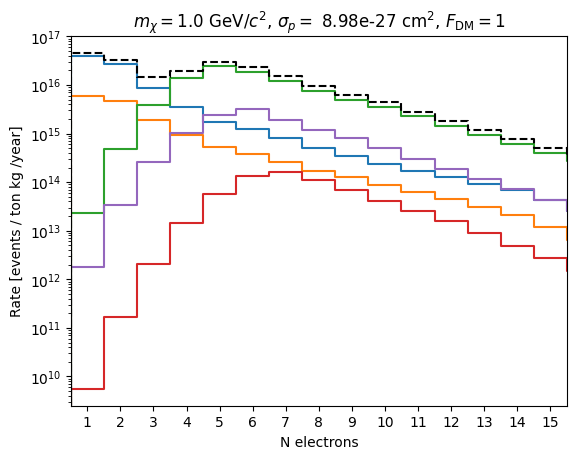

[0.00000000e+00 4.56271746e+13 3.20479028e+13 1.47573468e+13
 1.95703729e+13 2.93810584e+13 2.34091669e+13 1.51203317e+13
 9.47211469e+12 6.34145424e+12 4.39641772e+12 2.82550828e+12
 1.81490691e+12 1.19266636e+12 7.74801853e+11 5.06543517e+11
 3.27197638e+11]


In [16]:
from wimprates import *
# sigmaP = 4e-44
mMeV = 1000
m_gev = mMeV*1e-3
sigmaE = 1e-32
sigmaP = sigmaE_to_sigmaP(sigmaE,mMeV)


fdm = 0
n_el,drsn = dRdnE(mMeV,sigmaE,fdm,isoangle=4,mat = 'Xe',ne='All',return_shells=True,useVerne = True)
plot_dRdne(n_el,drsn,m_gev,sigmaP,tonyear=True)


print(np.sum(list(drsn.values()),axis=0))

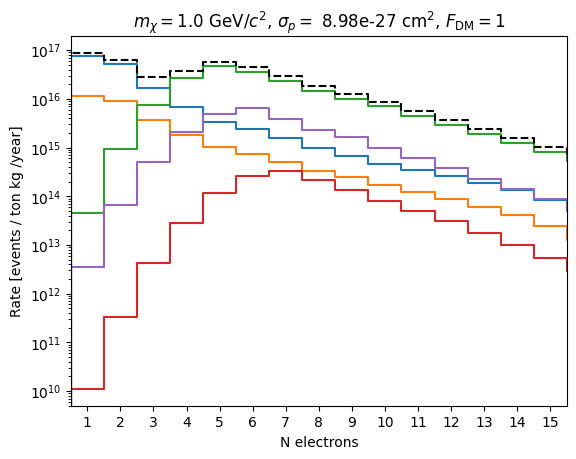

[0.00000000e+00 8.78695258e+13 6.21827895e+13 2.86683518e+13
 3.80382497e+13 5.72460905e+13 4.58735907e+13 2.97394659e+13
 1.86938151e+13 1.25507295e+13 8.71809581e+12 5.61348604e+12
 3.61163738e+12 2.37644194e+12 1.54557111e+12 1.01142744e+12
 6.53827585e+11]


In [17]:
from wimprates import *
# sigmaP = 4e-44
mMeV = 1000
m_gev = mMeV*1e-3
sigmaE = 1e-32
sigmaP = sigmaE_to_sigmaP(sigmaE,mMeV)


fdm = 0
n_el,drsn = dRdnE(mMeV,sigmaE,fdm,isoangle=0,mat = 'Xe',ne='All',return_shells=True,useVerne = True)
plot_dRdne(n_el,drsn,m_gev,sigmaP,tonyear=True)


print(np.sum(list(drsn.values()),axis=0))

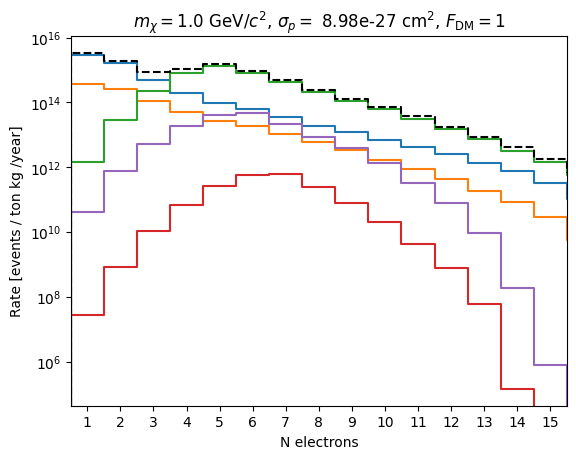

[0.00000000e+00 3.37488136e+12 1.90592409e+12 8.43362245e+11
 1.09923805e+12 1.51050484e+12 9.38746417e+11 4.96449168e+11
 2.47261856e+11 1.30725424e+11 7.38691798e+10 3.70967448e+10
 1.79860687e+10 8.84670114e+09 4.09181011e+09 1.76811209e+09
 6.92992844e+08]


In [18]:
from wimprates import *
# sigmaP = 4e-44
mMeV = 1000
m_gev = mMeV*1e-3
sigmaE = 1e-32
sigmaP = sigmaE_to_sigmaP(sigmaE,mMeV)


fdm = 0
n_el,drsn = dRdnE(mMeV,sigmaE,fdm,isoangle=8,mat = 'Xe',ne='All',return_shells=True,useVerne = True)
plot_dRdne(n_el,drsn,m_gev,sigmaP,tonyear=True)


print(np.sum(list(drsn.values()),axis=0))

In [19]:
from wimprates import *
#trying to reproduce old versions of plots
#for heavy
sigmaE_1GeV = sigmaP_to_sigmaE(1e-32,1000)
sigmaE_100MeV = sigmaP_to_sigmaE(1e-32,100)
sigmaE_10MeV = sigmaP_to_sigmaE(1e-32,10)
#for light
sigmaE_1GeV_light = sigmaP_to_sigmaE(1e-31,1000)
sigmaE_100MeV_light = sigmaP_to_sigmaE(1e-31,100)
sigmaE_10MeV_light = sigmaP_to_sigmaE(1e-31,10)
print(sigmaE_1GeV_light)
print(sigmaE_100MeV_light)
print(sigmaE_10MeV_light)


fdm = 0
nangles,rates_1GeV = get_modulated_rates(1000,sigmaE_1GeV,fdm,useVerne =True,mat='Xe',ne=1)
nangles,rates_100MeV = get_modulated_rates(100,sigmaE_100MeV,fdm,useVerne =True,mat='Xe',ne=1)
nangles,rates_10MeV = get_modulated_rates(10,sigmaE_10MeV,fdm,useVerne =True,mat='Xe',ne=1)
fdm = 2
nangles,rates_1GeV_light = get_modulated_rates(1000,sigmaE_1GeV_light,fdm,useVerne =True,mat='Xe',ne=1)
nangles,rates_100MeV_light = get_modulated_rates(100,sigmaE_100MeV_light,fdm,useVerne =True,mat='Xe',ne=1)
nangles,rates_10MeV_light = get_modulated_rates(10,sigmaE_10MeV_light,fdm,useVerne =True,mat='Xe',ne=1)

1.1131870701481017e-37
3.165028199847447e-36
2.41412834279241e-34


In [20]:
def format_digitize(filename):
    data = np.loadtxt(filename,delimiter=',')
    x = data[:,0]
    y = data[:,1]
    return x,y



<>:63: SyntaxWarning: invalid escape sequence '\d'
<>:64: SyntaxWarning: invalid escape sequence '\d'
<>:66: SyntaxWarning: invalid escape sequence '\d'
<>:71: SyntaxWarning: invalid escape sequence '\s'
<>:63: SyntaxWarning: invalid escape sequence '\d'
<>:64: SyntaxWarning: invalid escape sequence '\d'
<>:66: SyntaxWarning: invalid escape sequence '\d'
<>:71: SyntaxWarning: invalid escape sequence '\s'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/3514405008.py:63: SyntaxWarning: invalid escape sequence '\d'
  ax.annotate('North (+40$^\degree$ lat)',(40,2e4),fontsize=16,color='grey',usetex =False)
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/3514405008.py:64: SyntaxWarning: invalid escape sequence '\d'
  ax.annotate('South (-40$^\degree$ lat)',(115,2e4),fontsize=16,color='grey',usetex =False)
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/3514405008.py:66: SyntaxWarning: invalid escape sequence '\d'
  ax.set_xlabel('$\\Theta^{\

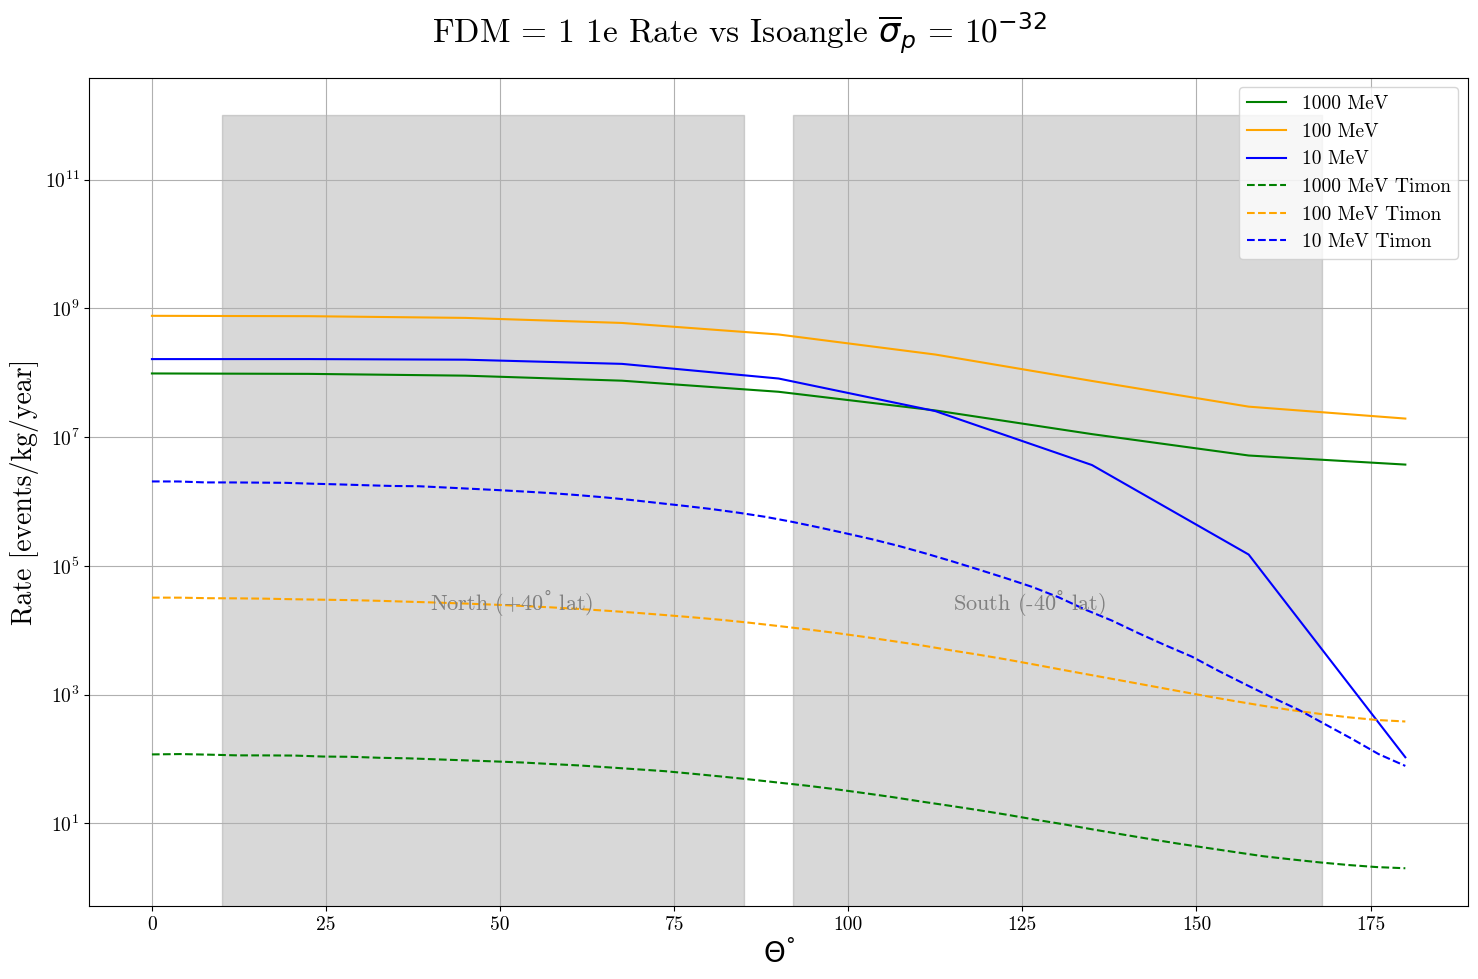

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
# plotting specifications
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.offsetbox import AnchoredText
#Options
params = {'text.usetex' : False,
          'font.size' : 14,
          'font.family' : 'cmr10',
         'figure.autolayout': True
          }
plt.rcParams.update(params)
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.labelsize']=16
plt.rcParams['figure.figsize']=(5,5)


fig,ax = plt.subplots(figsize=(15,10))
isoangles = np.linspace(0,180,nangles)
colors = ['orange','green','blue','red']

northx = np.arange(10,86,1)
northy1 = np.ones_like(northx)*1e12
northy2 = np.zeros_like(northx)


southx = np.arange(92,169,1)
southy1 = np.ones_like(southx)*1e12
southy2 = np.zeros_like(southx)

ax.fill_between(southx,southy1,southy2,color='grey',alpha=0.3)

ax.fill_between(northx,northy1,northy2,color='grey',alpha=0.3)


ax.plot(isoangles,rates_1GeV,label=f'1000 MeV',color=colors[1],ls='-')
ax.plot(isoangles,rates_100MeV,label=f'100 MeV',color=colors[0],ls='-')
ax.plot(isoangles,rates_10MeV,label=f'10 MeV',color=colors[2],ls='-')

paperx1000,papery1000 = format_digitize('1000_heavy.csv')
paperx1000 = np.linspace(0,180,len(papery1000))
ax.plot(paperx1000,papery1000,label=f'1000 MeV Timon',color=colors[1],ls='--')



paperx100,papery100 = format_digitize('100_heavy.csv')
paperx100 = np.linspace(0,180,len(papery100))
ax.plot(paperx100,papery100,label=f'100 MeV Timon',color=colors[0],ls='--')


paperx10,papery10 = format_digitize('10_heavy.csv')
paperx10 = np.linspace(0,180,len(papery10))
ax.plot(paperx10,papery10,label=f'10 MeV Timon',color=colors[2],ls='--')


ax.legend()

    # ax.fill_between(isoangles,QEDark_Spectra_1e33_heavy_high[mX],QEDark_Spectra_1e33_heavy_low[mX],color=colors[i])

ax.annotate('North (+40$^\degree$ lat)',(40,2e4),fontsize=16,color='grey',usetex =False)
ax.annotate('South (-40$^\degree$ lat)',(115,2e4),fontsize=16,color='grey',usetex =False)

ax.set_xlabel('$\\Theta^{\degree}$',fontsize=20)
ax.set_ylabel('Rate [events/kg/year]',fontsize=20)
ax.set_yscale('log')
# ax.set_ylim(1e7,1e10)
ax.grid()
fig.suptitle('FDM = 1 1e Rate vs Isoangle $\\overline{\sigma}_{p}$ = 10$^{-32}$',fontsize=(24))
plt.show()

plt.close(fig)
# ls = ['-','--']
# dummy_lines = []
# for b_idx in [0,1]:
#     dummy_lines.append(ax.plot([],[], c="black", ls = ls[b_idx])[0])
# legend2 = plt.legend([dummy_lines[i] for i in [0,1]], ["DaMaSCUS", "Verne"], loc=2)
# ax.add_artist(legend2)

# ax.annotate('1000 MeV',(50,4e8),color='green',fontsize=24)
# ax.annotate('100 MeV',(165,3e7),color='orange',fontsize=24)

# ax.annotate('10 MeV',(165,8e7),color='blue',fontsize=24)

# plt.tight_layout()


<>:63: SyntaxWarning: invalid escape sequence '\d'
<>:64: SyntaxWarning: invalid escape sequence '\d'
<>:66: SyntaxWarning: invalid escape sequence '\d'
<>:71: SyntaxWarning: invalid escape sequence '\s'
<>:63: SyntaxWarning: invalid escape sequence '\d'
<>:64: SyntaxWarning: invalid escape sequence '\d'
<>:66: SyntaxWarning: invalid escape sequence '\d'
<>:71: SyntaxWarning: invalid escape sequence '\s'
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/235244106.py:63: SyntaxWarning: invalid escape sequence '\d'
  ax.annotate('North (+40$^\degree$ lat)',(40,2e4),fontsize=16,color='grey')
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/235244106.py:64: SyntaxWarning: invalid escape sequence '\d'
  ax.annotate('South (-40$^\degree$ lat)',(115,2e4),fontsize=16,color='grey')
/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_41880/235244106.py:66: SyntaxWarning: invalid escape sequence '\d'
  ax.set_xlabel('$\\Theta^{\degree}$',fontsize=20)
/var/fol

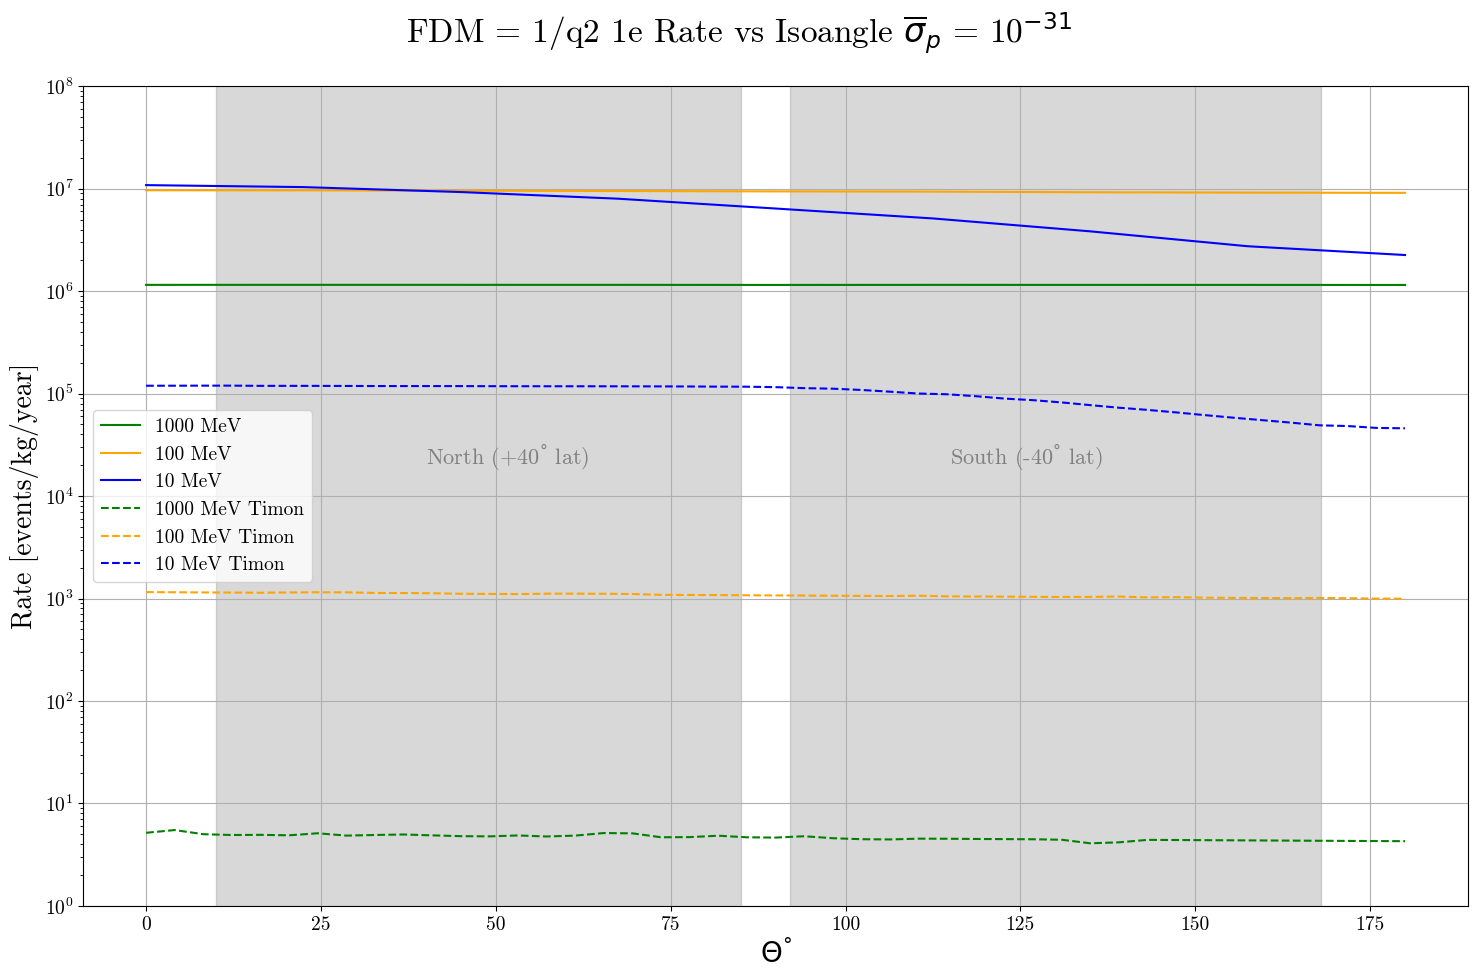

In [22]:
import matplotlib.pyplot as plt
import matplotlib
# plotting specifications
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.offsetbox import AnchoredText
#Options
params = {'text.usetex' : False,
          'font.size' : 14,
          'font.family' : 'cmr10',
         'figure.autolayout': True
          }
plt.rcParams.update(params)
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['axes.labelsize']=16
plt.rcParams['figure.figsize']=(5,5)


fig,ax = plt.subplots(figsize=(15,10))
isoangles = np.linspace(0,180,nangles)
colors = ['orange','green','blue','red']

northx = np.arange(10,86,1)
northy1 = np.ones_like(northx)*1e12
northy2 = np.zeros_like(northx)


southx = np.arange(92,169,1)
southy1 = np.ones_like(southx)*1e12
southy2 = np.zeros_like(southx)

ax.fill_between(southx,southy1,southy2,color='grey',alpha=0.3)

ax.fill_between(northx,northy1,northy2,color='grey',alpha=0.3)


ax.plot(isoangles,rates_1GeV_light,label=f'1000 MeV',color=colors[1],ls='-')
ax.plot(isoangles,rates_100MeV_light,label=f'100 MeV',color=colors[0],ls='-')
ax.plot(isoangles,rates_10MeV_light,label=f'10 MeV',color=colors[2],ls='-')



paperx1000,papery1000 = format_digitize('1000_light.csv')
paperx1000 = np.linspace(0,180,len(papery1000))
ax.plot(paperx1000,papery1000,label=f'1000 MeV Timon',color=colors[1],ls='--')



paperx100,papery100 = format_digitize('100_light.csv')
paperx100 = np.linspace(0,180,len(papery100))
ax.plot(paperx100,papery100,label=f'100 MeV Timon',color=colors[0],ls='--')


paperx10,papery10 = format_digitize('10_light.csv')
paperx10 = np.linspace(0,180,len(papery10))
ax.plot(paperx10,papery10,label=f'10 MeV Timon',color=colors[2],ls='--')


ax.legend()

    # ax.fill_between(isoangles,QEDark_Spectra_1e33_heavy_high[mX],QEDark_Spectra_1e33_heavy_low[mX],color=colors[i])

ax.annotate('North (+40$^\degree$ lat)',(40,2e4),fontsize=16,color='grey')
ax.annotate('South (-40$^\degree$ lat)',(115,2e4),fontsize=16,color='grey')

ax.set_xlabel('$\\Theta^{\degree}$',fontsize=20)
ax.set_ylabel('Rate [events/kg/year]',fontsize=20)
ax.set_yscale('log')
ax.set_ylim(1,1e8)
ax.grid()
fig.suptitle('FDM = 1/q2 1e Rate vs Isoangle $\\overline{\sigma}_{p}$ = 10$^{-31}$',fontsize=(24))
plt.show()
plt.close(fig)

# ls = ['-','--']
# dummy_lines = []
# for b_idx in [0,1]:
#     dummy_lines.append(ax.plot([],[], c="black", ls = ls[b_idx])[0])
# legend2 = plt.legend([dummy_lines[i] for i in [0,1]], ["DaMaSCUS", "Verne"], loc=2)
# ax.add_artist(legend2)

# ax.annotate('1000 MeV',(50,4e8),color='green',fontsize=24)
# ax.annotate('100 MeV',(165,3e7),color='orange',fontsize=24)

# ax.annotate('10 MeV',(165,8e7),color='blue',fontsize=24)

# plt.tight_layout()


In [23]:
# from wimprates import *
# generate_wimprates(2,useVerne = True,overwrite=False,material='Xe')

In [ ]:
def dme_ionization_ff(shell, e_er, q,argon=False):
    """Return dark matter electron scattering ionization form factor

    Outside the parametrized range, the form factor is assumed 0
    to give conservative results.

    :param shell: Name of atomic shell, e.g. '4p'
        Note not all shells are included in the data.
    :param e_er: Electronic recoil energy
    :param q: Momentun transfer
    """
    if isinstance(shell, tuple):
        shell = shell_str(*shell,argon=argon)
    
    if argon:
        shelldata = argon_shell_data
    else:
        shelldata = shell_data

    lnq = np.log(q / (nu.me * nu.c0 * nu.alphaFS))
    # From Mathematica: (*ER*) (2 lnkvalues[[j]])/Log[10]
    # log10 (E/Ry) = 2 lnk / ln10
    # lnk = log10(E/Ry) * ln10 / 2
    #     = lng(E/Ry) / 2
    # Ry = rydberg = 13.6 eV
    ry = nu.me * nu.e ** 4 / (8 * nu.eps0 ** 2 * nu.hPlanck ** 2)
    lnk = np.log(e_er / ry) / 2
    return 10**(shelldata[shell]['log10ffsquared_itp'](
        np.vstack([lnk, lnq]).T))

In [8]:
from electron import shell_data as shelldata
erec= 1
qmax = 203646.6919189611 * ightsp
lnq = np.log(qmax / (nu.me * nu.alphaFS))
ry = nu.me * nu.e ** 4 / (8 * nu.eps0 ** 2 * nu.hPlanck ** 2)
lnk = np.log(erec / ry) / 2
print(ry)
print(lnk,lnq)
10**(shelldata['5s']['log10ffsquared_itp'](
        np.vstack([lnk, lnq]).T))

1.1507642144704262e-21
24.106930348441427 90.52785527216531


array([0.])

In [10]:
nu.e

1.0267485814058999e-20

In [ ]:
def dme_ionization_ff(shell, e_er, q,argon=False):
    """Return dark matter electron scattering ionization form factor

    Outside the parametrized range, the form factor is assumed 0
    to give conservative results.

    :param shell: Name of atomic shell, e.g. '4p'
        Note not all shells are included in the data.
    :param e_er: Electronic recoil energy
    :param q: Momentun transfer
    """
    if isinstance(shell, tuple):
        shell = shell_str(*shell,argon=argon)
    
    if argon:
        shelldata = argon_shell_data
    else:
        shelldata = shell_data

    lnq = np.log(q / (nu.me * nu.c0 * nu.alphaFS))
    # From Mathematica: (*ER*) (2 lnkvalues[[j]])/Log[10]
    # log10 (E/Ry) = 2 lnk / ln10
    # lnk = log10(E/Ry) * ln10 / 2
    #     = lng(E/Ry) / 2
    # Ry = rydberg = 13.6 eV
    ry = nu.me * nu.e ** 4 / (8 * nu.eps0 ** 2 * nu.hPlanck ** 2)
    lnk = np.log(e_er / ry) / 2
    return 10**(shelldata[shell]['log10ffsquared_itp'](
        np.vstack([lnk, lnq]).T))

In [25]:
import numpy as np
from electron import *
shelldata = shell_data
qmax = (np.exp(shelldata['5s']['lnqs'].max()))
qmax *= nu.me * nu.c0 * nu.alphaFS
erec = np.geomspace(1, 400, 100)* nu.eV

qs = np.linspace(0,qmax,100)
ffs = np.zeros((len(qs),len(erec)))
for i,q in enumerate(qs):
    for j,er in enumerate(erec):
        ffs[i,j] = dme_ionization_ff('5s', er, q,argon=False)

/var/folders/k8/_jhxw6sx2gj8wjzbhc789q540000gn/T/ipykernel_42568/3807811641.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ffs[i,j] = dme_ionization_ff('5s', er, q,argon=False)


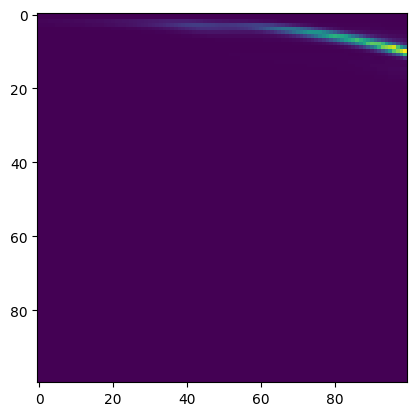

In [26]:
plt.imshow(ffs)

In [27]:
ffs

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.27923567e-02, 3.43747350e-02, 3.60216150e-02, ...,
        3.05077434e-03, 2.78576325e-03, 2.54377282e-03],
       [1.83205287e-01, 1.93867349e-01, 2.05143937e-01, ...,
        1.28173284e-02, 1.16809477e-02, 1.06453181e-02],
       ...,
       [1.98663673e-08, 2.10777956e-08, 2.23637896e-08, ...,
        8.59559277e-06, 9.25994792e-06, 9.97565121e-06],
       [1.67395951e-08, 1.77604440e-08, 1.88441398e-08, ...,
        7.27469959e-06, 7.83937351e-06, 8.44787834e-06],
       [1.41294909e-08, 1.49912380e-08, 1.59060471e-08, ...,
        6.16722723e-06, 6.64796110e-06, 7.16616805e-06]])